# 1:  Instalación y carga de librerías 

In [1]:
# Instalación de las librerías necesarias mediante el comando "install.packages()"
install.packages("ggcorrplot")
install.packages("zoo")
install.packages("git2r")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘plyr’, ‘Rcpp’, ‘reshape2’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [2]:
# Carga de las librerías mediante el comando "library()"
library(tidyverse) # La librería tidyverse es una colección de paquetes de R que facilitan la manipulación, visualización y análisis de datos. Este colección de paquetes incluye ggplot2
library(zoo) # La librería zoo es un paquete de R que proporciona herramientas para trabajar con series de tiempo, permitiendo almacenar y manipular datos de series temporales 
library(ggcorrplot) # La librería ggcorrplot es un paquete de R que permite crear gráficos de matriz de correlación utilizando la librería ggplot2
library(git2r) # La librería git2R es un paquete de R que proporciona una interfaz de programación para interactuar con Git

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.4.1     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.4.1
✔ readr   2.1.4     ✔ forcats 1.0.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric



Attaching package: ‘git2r’


The following object is masked from ‘package:dplyr’:

    pull


The following objects are masked from ‘package:purrr’:

    is_empty, when




#2: Carga de los conjuntos de datos

Clonamos el repositorio de Github con los conjuntos de datos original, los cuales se mostrarán en el apartado izquierdo de la interfaz dentro de la carpeta "datasets"

In [3]:
# Establecemos el directorio de trabajo
setwd("/content")

# Clonamos la carpeta de Github con los conjuntos de datos iniciales y los introducimos en una nueva carpeta llamada "Github"
git2r::clone("https://github.com/datosgobes/Laboratorio-de-Datos.git", "Github")

cloning into 'Github'...
Receiving objects:   1% (30/2953),   23 kb
Receiving objects:  11% (325/2953),  175 kb
Receiving objects:  21% (621/2953), 78872 kb
Receiving objects:  31% (916/2953), 85968 kb
Receiving objects:  41% (1211/2953), 86687 kb
Receiving objects:  51% (1507/2953), 86959 kb
Receiving objects:  61% (1802/2953), 92153 kb
Receiving objects:  71% (2097/2953), 161385 kb
Receiving objects:  81% (2392/2953), 165429 kb
Receiving objects:  91% (2688/2953), 166116 kb
Receiving objects: 100% (2953/2953), 200741 kb, done.


Local:    main /content/Github
Remote:   main @ origin (https://github.com/datosgobes/Laboratorio-de-Datos.git)
Head:     [e2ce874] 2023-04-05: Add files via upload

Cargamos los conjuntos de datos correspondientes a la estación meteorológica de Córdoba

In [4]:
# Se crea una lista con el nombre de los archivos a importar
file_names <- c("C_1990.csv", "C_1991.csv", "C_1992.csv", "C_1993.csv", "C_1994.csv", "C_1995.csv", "C_1996.csv", "C_1997.csv", "C_1998.csv", "C_1999.csv", "C_2000.csv", "C_2001.csv", "C_2002.csv", "C_2003.csv", "C_2004.csv", "C_2005.csv", "C_2006.csv", "C_2007.csv", "C_2008.csv", "C_2009.csv", "C_2010.csv", "C_2011.csv", "C_2012.csv", "C_2013.csv", "C_2014.csv", "C_2015.csv", "C_2016.csv", "C_2017.csv", "C_2018.csv", "C_2019.csv", "C_2020.csv")

# Se crea un bucle "for" para iterar a través de la lista con el nombre de los archivos
for (file_name in file_names) {
  # Se crea una variable que contiene la ruta completa del archivo
  full_file_path <- paste0("/content/Github/Visualizaciones/Analisis_datos_meteorologicos/Conjunto_datos_origen/", file_name)
  # Leer el archivo correspondiente 
  dataset <- read.csv(full_file_path, sep = ",")
  # Almacenar el archivo correspondiente en la variable
  dataset <- dataset[-nrow(dataset),]
  # Eliminamos la última fila del conjunto de datos (no es necesaria para el análisis)
  assign(gsub(".csv", "", file_name), dataset)
}

# Visualizamos en pantalla uno de los conjuntos de datos importados
head(C_1990, 12)

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,inso,q_max,nw_55,⋯,n_tor,w_med,nt_00,ti_max,n_nie,tm_mes,tm_max,nv_0100,q_min,np_010
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
1,1990-1,5402,21.3(27),8,77,0,1,6.0,1026.2(21),1,⋯,0,7,1,11.6,0,9.6,14.8,0,996.5(28),8
2,1990-2,5402,0.0(--),1,71,0,6,8.2,1023.3(23),0,⋯,1,6,0,12.4,0,13.0,20.4,0,1005.7(16),0
3,1990-3,5402,9.2(31),6,60,0,0,6.0,1021.2(20),NA,⋯,1,12,0,14.0,0,14.8,21.8,0,1002.2(31),5
4,1990-4,5402,28.2(01),5,64,1,0,7.4,1014.9(18),NA,⋯,6,12,0,16.2,0,14.8,21.0,0,990.9(06),12
5,1990-5,5402,1.1(12),0,57,0,0,10.5,1012.5(28),0,⋯,0,9,0,22.0,0,20.3,28.1,0,998.7(09),1
6,1990-6,5402,0.0(--),0,53,0,0,11.3,1008.7(26),0,⋯,0,13,0,27.0,0,23.9,32.1,0,1000.0(04),0
7,1990-7,5402,1.8(27),0,42,0,0,11.5,1010.0(29),NA,⋯,0,9,0,32.2,0,28.8,38.1,0,998.6(18),1
8,1990-8,5402,1.6(19),0,47,0,0,10.8,1011.0(05),NA,⋯,2,10,0,32.4,0,28.4,37.2,0,999.0(07),1
9,1990-9,5402,9.0(08),5,55,0,0,7.1,1013.2(27),1,⋯,1,8,0,27.4,0,25.8,32.8,0,1000.0(04),3


Cargamos los conjuntos de datos correspondientes a la estación meteorológica de Burgos.

In [5]:
# Importar los datos de Burgos

# Creamos una lista con el nombre de los archivos a importar
file_names <- c("B_1990.csv", "B_1991.csv", "B_1992.csv", "B_1993.csv", "B_1994.csv", "B_1995.csv", "B_1996.csv", "B_1997.csv", "B_1998.csv", "B_1999.csv", "B_2000.csv", "B_2001.csv", "B_2002.csv", "B_2003.csv", "B_2004.csv", "B_2005.csv", "B_2006.csv", "B_2007.csv", "B_2008.csv", "B_2009.csv", "B_2010.csv", "B_2011.csv", "B_2012.csv", "B_2013.csv", "B_2014.csv", "B_2015.csv", "B_2016.csv", "B_2017.csv", "B_2018.csv", "B_2019.csv", "B_2020.csv")

# Se crea un bucle "for" para iterar a través de la lista con el nombre de los archivos
for (file_name in file_names) {
  # Se crea una variable que contiene la ruta completa del archivo
  full_file_path <- paste0("/content/Github/Visualizaciones/Analisis_datos_meteorologicos/Conjunto_datos_origen/", file_name)
  # Leer el archivo correspondiente 
  dataset <- read.csv(full_file_path, sep = ",")
  # Almacenar el archivo correspondiente en la variable
  dataset <- dataset[-nrow(dataset),]
  # Eliminamos la última fila del conjunto de datos (no es necesaria para el análisis)
  assign(gsub(".csv", "", file_name), dataset)
}

# Visualizamos en pantalla uno de los conjuntos de datos importados
head(B_1990, 12)

,fecha,indicativo,p_max,n_cub,hr,n_gra,n_fog,inso,q_max,nw_55,⋯,nt_00,ti_max,n_nie,tm_mes,tm_max,nv_0100,ts_50,q_min,np_010,evap
,<chr>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
1,1990-1,2331,16.5(27),13,86,0,8,2.8,932.7(21),5,⋯,19,0.0,2,2.8,6.7,1,6.1,898.6(27),8,NA
2,1990-2,2331,5.2(21),9,80,0,5,3.9,931.1(23),7,⋯,6,5.8,1,7.5,12.0,0,7.3,911.1(12),4,461
3,1990-3,2331,1.3(07),4,66,2,3,6.8,935.0(10),5,⋯,12,5.0,2,7.3,14.0,0,8.6,914.6(31),2,NA
4,1990-4,2331,18.6(08),11,77,2,2,4.4,926.5(17),5,⋯,5,6.0,3,6.9,11.5,0,9.1,894.9(06),10,441
5,1990-5,2331,12.3(08),5,69,2,1,7.6,925.5(28),3,⋯,0,15.7,0,13.3,19.9,0,14.1,908.2(12),9,718
6,1990-6,2331,22.1(11),2,66,1,2,9.2,921.8(24),NA,⋯,0,14.1,0,16.0,22.6,0,18.2,909.3(04),7,787
7,1990-7,2331,4.3(14),0,52,0,0,11.3,924.7(07),3,⋯,0,18.2,0,20.0,28.8,0,21.3,911.8(13),3,1358
8,1990-8,2331,13.5(30),0,56,0,1,9.9,924.0(17),4,⋯,0,16.0,0,20.0,28.3,0,22.1,914.3(13),5,1318
9,1990-9,2331,9.9(28),1,70,1,1,7.1,923.9(27),2,⋯,0,18.5,0,17.8,25.2,0,19.8,909.6(25),4,774


# 3: Análisis Exploratorio de Datos (EDA)

Realizamos un rapido EDA para comprender cual es el contenido de los conjuntos de datos importados en el apartado anterior, con los que vamos a trabajar.

In [6]:
# Imprimimos el nombre de las variables de un conjunto de datos, para comprobando los metadatos, decidir cuales son las que nos interesan
colnames(B_1990)

[1] "fecha"      "indicativo" "p_max"      "n_cub"      "hr"        
 [6] "n_gra"      "n_fog"      "inso"       "q_max"      "nw_55"     
[11] "q_mar"      "q_med"      "tm_min"     "ta_max"     "ts_min"    
[16] "nt_30"      "nv_0050"    "n_des"      "w_racha"    "np_100"    
[21] "n_nub"      "p_sol"      "nw_91"      "ts_20"      "np_001"    
[26] "ta_min"     "w_rec"      "e"          "np_300"     "nv_1000"   
[31] "p_mes"      "n_llu"      "n_tor"      "ts_10"      "w_med"     
[36] "nt_00"      "ti_max"     "n_nie"      "tm_mes"     "tm_max"    
[41] "nv_0100"    "ts_50"      "q_min"      "np_010"     "evap"

In [7]:
# Imprimimos la estructura de uno de los conjuntos de datos
str(B_1990)

'data.frame':	12 obs. of  45 variables:
 $ fecha     : chr  "1990-1" "1990-2" "1990-3" "1990-4" ...
 $ indicativo: int  2331 2331 2331 2331 2331 2331 2331 2331 2331 2331 ...
 $ p_max     : chr  "16.5(27)" "5.2(21)" "1.3(07)" "18.6(08)" ...
 $ n_cub     : num  13 9 4 11 5 2 0 0 1 11 ...
 $ hr        : num  86 80 66 77 69 66 52 56 70 76 ...
 $ n_gra     : num  0 0 2 2 2 1 0 0 1 0 ...
 $ n_fog     : num  8 5 3 2 1 2 0 1 1 1 ...
 $ inso      : num  2.8 3.9 6.8 4.4 7.6 9.2 11.3 9.9 7.1 3.9 ...
 $ q_max     : chr  "932.7(21)" "931.1(23)" "935.0(10)" "926.5(17)" ...
 $ nw_55     : num  5 7 5 5 3 NA 3 4 2 NA ...
 $ q_mar     : num  1027 1024 1029 1017 1017 ...
 $ q_med     : num  921 921 925 914 916 ...
 $ tm_min    : num  -1.2 3 0.5 2.2 6.6 9.3 11.3 11.8 10.3 6.6 ...
 $ ta_max    : chr  "10.8(25)" "19.8(23)" "24.3(20)" "19.8(29)" ...
 $ ts_min    : num  6.6 8.4 6.2 7 12 14.7 17.8 17.2 14 13.4 ...
 $ nt_30     : num  0 0 0 0 0 1 16 12 1 0 ...
 $ nv_0050   : num  0 0 0 0 0 0 0 0 0 0 ...
 $ n_de

In [8]:
# Imprimimos el resumen estadístico de uno de los conjuntos de datos
summary(B_1990)

    fecha             indicativo      p_max               n_cub       
 Length:12          Min.   :2331   Length:12          Min.   : 0.000  
 Class :character   1st Qu.:2331   Class :character   1st Qu.: 1.750  
 Mode  :character   Median :2331   Mode  :character   Median : 7.000  
                    Mean   :2331                      Mean   : 6.333  
                    3rd Qu.:2331                      3rd Qu.:10.250  
                    Max.   :2331                      Max.   :13.000  
                                                                      
       hr            n_gra            n_fog            inso       
 Min.   :52.00   Min.   :0.0000   Min.   :0.000   Min.   : 2.800  
 1st Qu.:66.00   1st Qu.:0.0000   1st Qu.:1.000   1st Qu.: 3.800  
 Median :73.00   Median :0.0000   Median :2.000   Median : 5.600  
 Mean   :72.33   Mean   :0.6667   Mean   :3.083   Mean   : 6.108  
 3rd Qu.:81.25   3rd Qu.:1.2500   3rd Qu.:5.250   3rd Qu.: 8.000  
 Max.   :86.00   Max.   :2.000

# 4: Preparación de las tablas de datos

En el siguiente apartado, realizaremos los ajustes necesarios para convertir los conjuntos de datos en tablas de datos con los que alimentar las visualizaciones.

## 4.1: Filtrado de las variables de interés

Filtramos las variables de interés para el análisis de la tabla de datos perteneciente a la estación meteorológica de Córdoba. 

In [9]:
# Creamos una lista con los conjuntos de datos que queremos filtrar
lista_df <- list(C_1990, C_1991, C_1992, C_1993, C_1994, C_1995, C_1996, C_1997, C_1998, C_1999, C_2000, C_2001, C_2002, C_2003, C_2004, C_2005, C_2006, C_2007, C_2008, C_2009, C_2010, C_2011, C_2012, C_2013, C_2014, C_2015, C_2016, C_2017, C_2018, C_2019, C_2020)

# Creamos una lista vacía para almacenar las tablas de datos filtrados
lista_df_filtrados <- list()

# Mediante un bucle "for" iteramos sobre la lista de conjuntos de datos y aplicamos el filtrado elegido quedandonos con las variables de interés
for (i in 1:length(lista_df)) {
  # Seleccionamos un subconjunto de columnas específicas
  df_filtrado <- subset(lista_df[[i]], select = c("fecha", "tm_mes", "tm_max", "tm_min", "nt_30", "nt_00", "p_mes"))
  lista_df_filtrados[[i]] <- df_filtrado
}

# Asignamos las tablas de datos filtrados a sus respectivas variables
for (i in 1990:2020) {
  assign(paste0("C_", i), lista_df_filtrados[[i-1989]])
}

# Visualizamos en pantalla uno de los tablas de datos una vez filtrada
C_1990


,fecha,tm_mes,tm_max,tm_min,nt_30,nt_00,p_mes
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990-1,9.6,14.8,4.3,0,1,73.6
2,1990-2,13.0,20.4,5.5,0,0,0.0
3,1990-3,14.8,21.8,7.9,0,0,20.7
4,1990-4,14.8,21.0,8.7,0,0,119.3
5,1990-5,20.3,28.1,12.4,9,0,1.1
6,1990-6,23.9,32.1,15.6,23,0,0.0
7,1990-7,28.8,38.1,19.5,31,0,1.8
8,1990-8,28.4,37.2,19.6,31,0,1.6
9,1990-9,25.8,32.8,18.9,26,0,11.8


Filtramos las variables de interés para el análisis de la tabla de datos perteneciente a la estación meteorológica de Burgos.

In [10]:
# Creamos una lista con los data frames que queremos filtrar
lista_df <- list(B_1990, B_1991, B_1992, B_1993, B_1994, B_1995, B_1996, B_1997, B_1998, B_1999, B_2000, B_2001, B_2002, B_2003, B_2004, B_2005, B_2006, B_2007, B_2008, B_2009, B_2010, B_2011, B_2012, B_2013, B_2014, B_2015, B_2016, B_2017, B_2018, B_2019, B_2020)

# Creamos una lista vacía para almacenar los data frames filtrados
lista_df_filtrados <- list()

# Mediante un bucle "for" iteramos sobre la lista de conjuntos de datos y aplicamos el filtrado elegido quedandonos con las variables de interés
for (i in 1:length(lista_df)) {
  # Seleccionamos un subconjunto de columnas específicas
  df_filtrado <- subset(lista_df[[i]], select = c("fecha", "tm_mes", "tm_max", "tm_min", "nt_30", "nt_00", "p_mes"))
  lista_df_filtrados[[i]] <- df_filtrado
}

# Asignamos las tablas de datos filtrados a sus respectivas variables
for (i in 1990:2020) {
  assign(paste0("B_", i), lista_df_filtrados[[i-1989]])
}

# Visualizamos en pantalla uno de los tablas de datos una vez filtrada
B_1990

,fecha,tm_mes,tm_max,tm_min,nt_30,nt_00,p_mes
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990-1,2.8,6.7,-1.2,0,19,49.6
2,1990-2,7.5,12.0,3.0,0,6,18.6
3,1990-3,7.3,14.0,0.5,0,12,4.1
4,1990-4,6.9,11.5,2.2,0,5,74.9
5,1990-5,13.3,19.9,6.6,0,0,72.9
6,1990-6,16.0,22.6,9.3,1,0,62.4
7,1990-7,20.0,28.8,11.3,16,0,9.5
8,1990-8,20.0,28.3,11.8,12,0,25.7
9,1990-9,17.8,25.2,10.3,1,0,25.6


## 4.2: Generación de las tablas con los valores de interés

Sobre las tablas filtradas previamente para los datos de la estación meteorológica de Córdoba, calculamos los valores medios anuales de las variables "tm_mes", "tm_max" y "tm_min" y los valores totales anuales de las variables "nt_30", "nt_00" y "p_mes".

In [11]:
# Creamos una lista vacía para almacenar los resultados
resultados_C <- list()

# Definimos un bucle "for" para recorrer cada año
for (i in 1990:2020) {
  # Extraemos los datos correspondientes al año i
  datos <- get(paste0("C_", i))
  # Calculamos el promedio de las columnas "tm_mes", "tm_max" y "tm_min
  promedios <- colMeans(datos[, c("tm_mes", "tm_max", "tm_min")])
  # Calculamos la suma de las columnas  "nt_30", "nt_00" y "p_mes"
  sumas <- colSums(datos[, c("nt_30", "nt_00", "p_mes")])
  # Almacenamos los resultados en la lista
  resultados_C[[i-1989]] <- c(sumas, promedios)
}

# Concatenamos los resultados en una matriz
matriz_resultados_C <- do.call(rbind, resultados_C)

# Convertimos la matriz en un dataframe y agregamos una columna para el año
datos_total_df_C <- data.frame(año = 1990:2020, matriz_resultados_C)

# Visualizamos los primeros valores de la tabla de datos generada
head(datos_total_df_C, 5)

,año,nt_30,nt_00,p_mes,tm_mes,tm_max,tm_min
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1990,123,10,447.3,18.27500,25.17500,11.37500
2,1991,124,23,632.2,17.50000,24.54167,10.47500
3,1992,106,27,549.2,17.18333,24.64167,9.72500
4,1993,94,31,418.3,17.13333,24.26667,9.97500
5,1994,124,25,331.7,18.34167,25.88333,10.76667


Sobre las tablas filtradas previamente para los datos de la estación meteorológica de Burgos, calculamos los valores medios anuales de las variables "tm_mes", "tm_max" y "tm_min" y los valores totales anuales de las variables "nt_30", "nt_00" y "p_mes".

In [12]:
# Creamos una lista vacía para almacenar los resultados
resultados_B <- list()

# Definimos un bucle "for" para recorrer cada año
for (i in 1990:2020) {
  # Extraemps los datos correspondientes al año i
  datos <- get(paste0("B_", i))
  # Calculamos el promedio de las columnas "tm_mes", "tm_max" y "tm_min
  promedios <- colMeans(datos[, c("tm_mes", "tm_max", "tm_min")])
  # Calculamos la suma de las columnas  "nt_30", "nt_00" y "p_mes"
  sumas <- colSums(datos[, c("nt_30", "nt_00", "p_mes")])
  # Almacenamos los resultados en la lista
  resultados_B[[i-1989]] <- c(sumas, promedios)
}

# Concatenamos los resultados en una matriz
matriz_resultados_B <- do.call(rbind, resultados_B)

# Convertimos la matriz en un dataframe y agregamos una columna para el año
datos_total_df_B <- data.frame(año = 1990:2020, matriz_resultados_B)

# Visualizamos los ultimos valores de la tabla de datos 
tail(datos_total_df_B)

,año,nt_30,nt_00,p_mes,tm_mes,tm_max,tm_min
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
26,2015,45,83,383.2,11.22500,17.26667,5.116667
27,2016,41,75,615.6,11.10833,17.10000,5.075000
28,2017,43,82,321.4,11.67500,18.63333,4.658333
29,2018,28,67,628.8,11.14167,16.71667,5.525000
30,2019,36,81,571.7,11.39167,17.70833,5.008333
31,2020,34,59,540.1,11.76667,17.80000,5.708333


## 4.3:  Eliminación de los valores nulos

Cabe destacar que este proceso de detención de valores nulos es parte del EDA. No obstante, lo hemos introducido en este apartado debido a que necesitamos tener previamente generadas las tablas de datos.
Una vez eliminados los valores nulos, transformaremos las tablas de datos a formato dataframe para poder alimentar las visualizaciones futuras.

Buscamos valores nulos en la tabla de datos previamente generada correspondiente a la estación meteorológica de Córdoba. 

In [13]:
# Búscamos de valores nulos y la fila en la que se encuentran 
indices_filas_con_nulos <- which(apply(is.na(datos_total_df_C), 1, any))
indices_filas_con_nulos

[1] 23 27

Eliminamos los valores nulos encontrados en la fila 23 y 27, deduciendo su valor mediante interpolaciñon lineal.

In [14]:
# Aplicamos la función na.approx() a cada columna que contenga valores nulos 
datos_total_df_C <- na.approx(datos_total_df_C)
# Transformamos la tabla de datos a formato dataframe
datos_graficas_C <- as.data.frame(datos_total_df_C)

Buscamos valores nulos en la tabla de datos previamente generada correspondiente a la estación meteorológica de Burgos. 

In [15]:
# Búsqueda de valores nulos y donde se encuentran
indices_filas_con_nulos <- which(apply(is.na(datos_total_df_B), 1, any))
indices_filas_con_nulos

integer(0)

In [16]:
# Transformar la tabla de datos a formato dataframe
datos_graficas_B <- as.data.frame(datos_total_df_B)

# 5: Visualizaciones

Acontinuación, mediante el paquete "ggplot2", construiremos diversas visualizaciones para extraer información de las tablas de datos previamente preprocesadas.

## 5.1: Gráficos de líneas

Creamos varias gráficos de líneas con la evolución temporal de los valores de temperaturas medias "tm_mes", mínimas "tm_min" y máximas "tm_max" de las dos estaciones meteorológicas analizadas (Córdoba y Burgos). 

Con la finalidad de comparar las distintas evoluciones, graficamos las líneas de tendencia y calculamos sus coeficientes de pendiente.

`geom_smooth()` using formula = 'y ~ x'


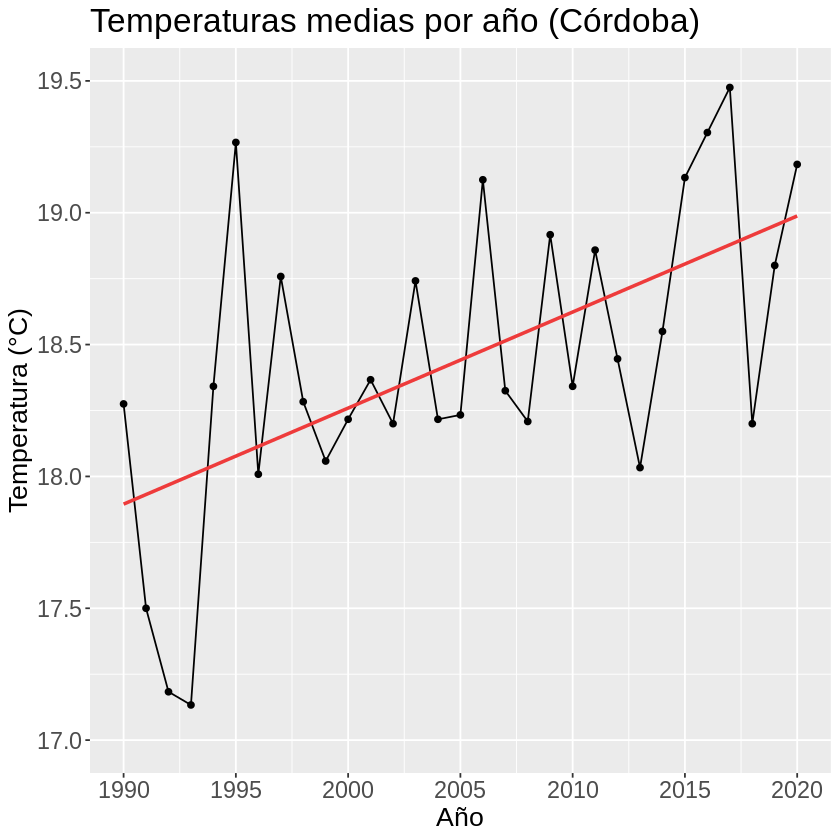

In [17]:
# Gráfico de lineas para mostrar la temperatura media anual en la estación meteorológica de Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "año" y "tm_mes"
grafica_lineas_1 <- ggplot(datos_graficas_C, aes(x= año, y = tm_mes)) +
      # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal 
      geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
      # Establecemos los intervalos y etiquetas para los ejes
      scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(17,19.5), breaks = seq(17, 19.5, by = 0.5)) +
      # Añadimos el título a la gráfica y las etiquetas de los ejes
      labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias por año (Córdoba)") +
      # Ajustamos los tamaños del título y de las etiquetas de los ejes  
      theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_1)

`geom_smooth()` using formula = 'y ~ x'


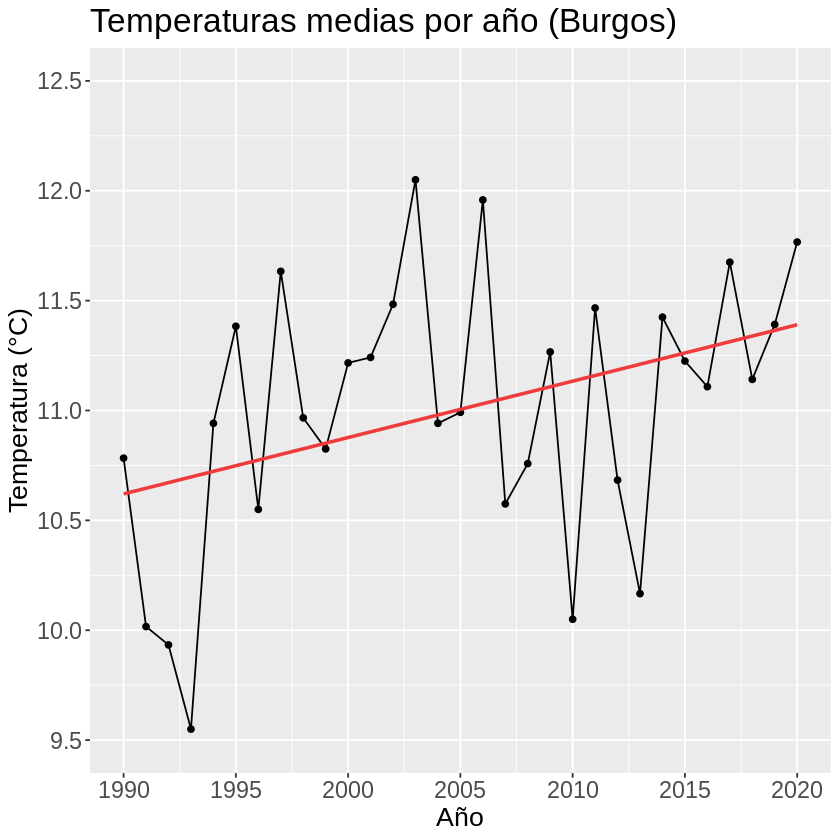

In [18]:
# Gráfico de lineas para mostrar la temperatura media anual en la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando las variables "año" y "tm_mes" 
grafica_lineas_2 <- ggplot(datos_graficas_B, aes(x= año, y = tm_mes)) +
  # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal (línea de tendencia)
  geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(9.5,12.5), breaks = seq(9.5, 12.5, by = 0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias por año (Burgos)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_2)

`geom_smooth()` using formula = 'y ~ x'


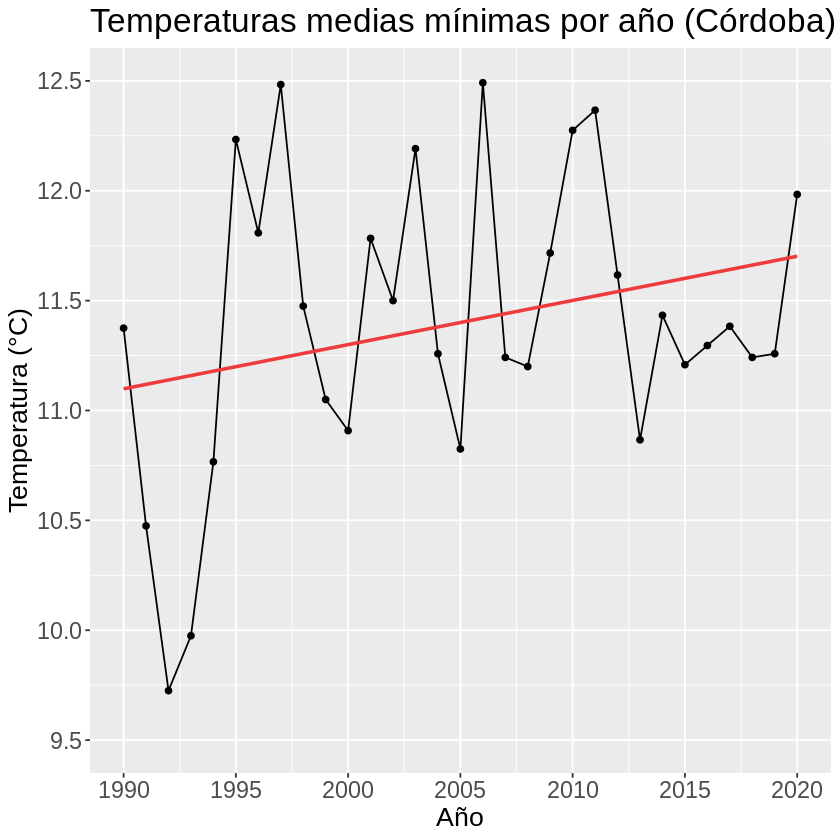

In [19]:
# Gráfico de lineas para mostrar la temperatura media mínima anual en la estación meteorológica de Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "año" y "tm_min" 
grafica_lineas_3 <- ggplot(datos_graficas_C, aes(x= año, y = tm_min)) +
  # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal (línea de tendencia)
  geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(9.5,12.5), breaks = seq(9.5,12.5, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias mínimas por año (Córdoba)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_3)

`geom_smooth()` using formula = 'y ~ x'


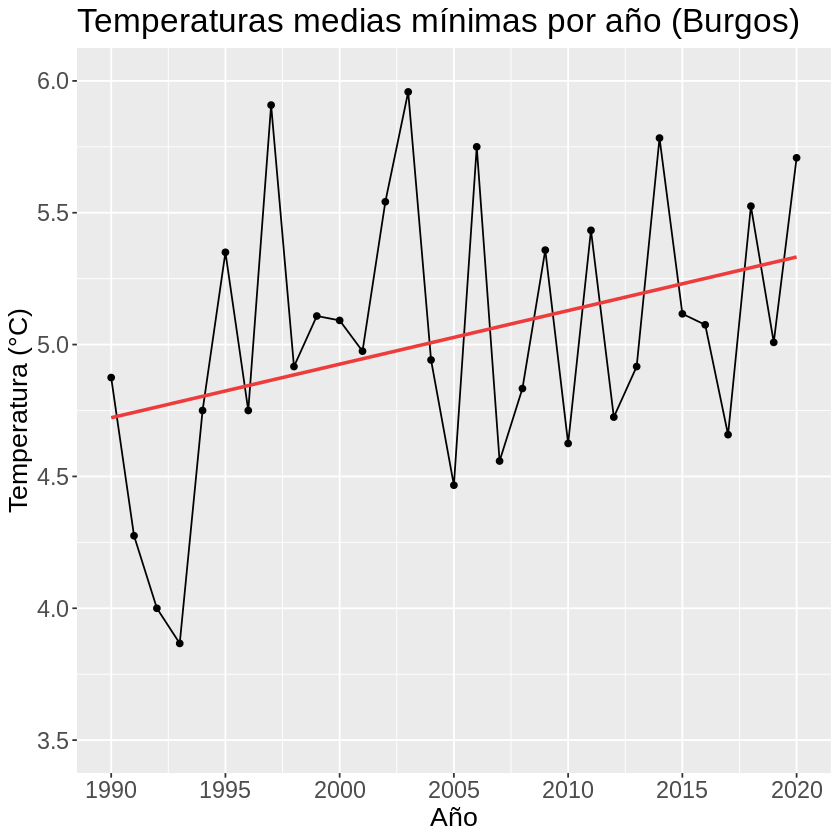

In [20]:
# Gráfico de lineas para mostrar la temperatura media mínima anual en la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando las variables "año" y "tm_min"
grafica_lineas_4 <- ggplot(datos_graficas_B, aes(x= año, y = tm_min)) +
  # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal (línea de tendencia)
  geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
  # Establecemos los intervalos y etiquetas para los ejes  
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(3.5,6), breaks = seq(3.5,6, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias mínimas por año (Burgos)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_4)

`geom_smooth()` using formula = 'y ~ x'


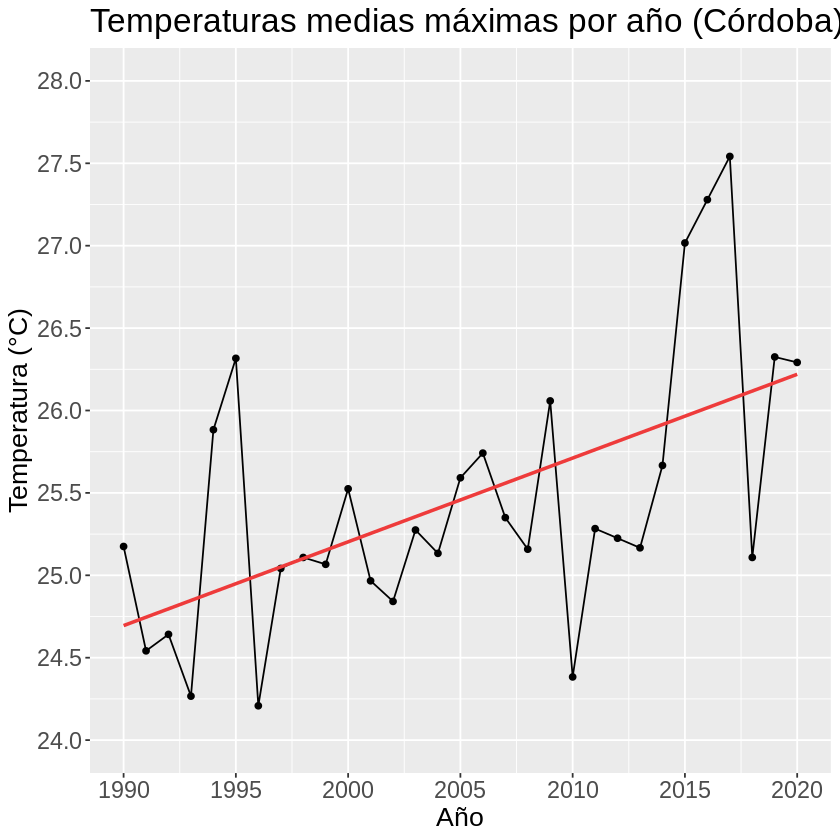

In [21]:
# Gráfico de lineas para mostrar la temperatura media máxima anual en la estación meteorológica de Cordoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "año" y "tm_max"
grafica_lineas_5 <- ggplot(datos_graficas_C, aes(x= año, y = tm_max)) +
  # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal (línea de tendencia)
  geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
  # Establecemos los intervalos y etiquetas para los ejes  
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(24,28), breaks = seq(24,28, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias máximas por año (Córdoba)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_5)

`geom_smooth()` using formula = 'y ~ x'


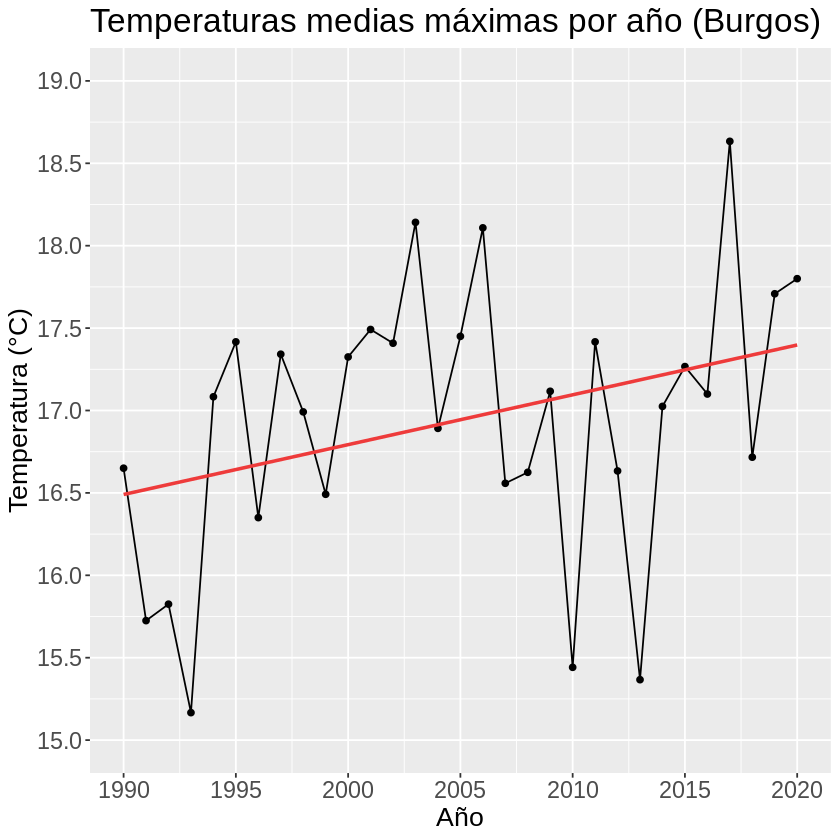

In [22]:
# Gráfico de lineas para mostrar la temperatura media máxima anual en la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando las variables "año" y "tm_max"
grafica_lineas_6 <- ggplot(datos_graficas_B, aes(x= año, y = tm_max)) +
  # Utilizamos la función geom_line para dibujar la línea, la función geom_point para mostrar puntos en la gráfica y la función geom_smooth para ajustar un modelo lineal (línea de tendencia)
  geom_line() + geom_point() + geom_smooth(method = "lm", se = FALSE, color = "brown2") +
  # Establecemos los intervalos y etiquetas para los ejes 
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(15,19), breaks = seq(15,19, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Temperatura (°C)", title="Temperaturas medias máximas por año (Burgos)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_6)

In [23]:
# Ajustamos los modelos lineales que estiman la relación entre las temperaturas y los años
modelo1 <- lm(tm_mes ~ año, data = datos_graficas_C)
modelo2 <- lm(tm_mes ~ año, data = datos_graficas_B)
modelo3 <- lm(tm_min ~ año, data = datos_graficas_C)
modelo4 <- lm(tm_min ~ año, data = datos_graficas_B)
modelo5 <- lm(tm_max ~ año, data = datos_graficas_C)
modelo6 <- lm(tm_max ~ año, data = datos_graficas_B)

# Obtenemos los coeficientes de pendiente de los modelos anteriores que representan las pendientes de la rectas, es decir, el cambio en la variable respuesta (tm_mes, tm_min, tm_max) por cada unidad de cambio en la variable predictora (año)
pendiente1 <- coef(modelo1)[2]
pendiente2 <- coef(modelo2)[2]
pendiente3 <- coef(modelo3)[2]
pendiente4 <- coef(modelo4)[2]
pendiente5 <- coef(modelo5)[2]
pendiente6 <- coef(modelo6)[2]

# Imprimimos en pantalla los coeficiones calculados previamente para cada una las gráficas.
print(paste0("La variación de temperatura promedio anual para las temperaturas medias de Córdoba es: ", pendiente1, "."))
print(paste0("La variación de temperatura promedio anual para las temperaturas medias de Burgos es: ", pendiente2, "."))
print(paste0("La variación de temperatura promedio anual para las temperaturas mínimas de Córdoba es: ", pendiente3, "."))
print(paste0("La variación de temperatura promedio anual para las temperaturas mínimas de Burgos es: ", pendiente4, "."))
print(paste0("La variación de temperatura promedio anual para las temperaturas máximas de Córdoba es: ", pendiente5, "."))
print(paste0("La variación de temperatura promedio anual para las temperaturas máximas de Burgos es: ", pendiente6, "."))


[1] "La variación de temperatura promedio anual para las temperaturas medias de Córdoba es: 0.0364247311827958."
[1] "La variación de temperatura promedio anual para las temperaturas medias de Burgos es: 0.0256552419354837."
[1] "La variación de temperatura promedio anual para las temperaturas mínimas de Córdoba es: 0.0201058467741936."
[1] "La variación de temperatura promedio anual para las temperaturas mínimas de Burgos es: 0.0203192204301074."
[1] "La variación de temperatura promedio anual para las temperaturas máximas de Córdoba es: 0.0508249327956988."
[1] "La variación de temperatura promedio anual para las temperaturas máximas de Burgos es: 0.0302385752688169."


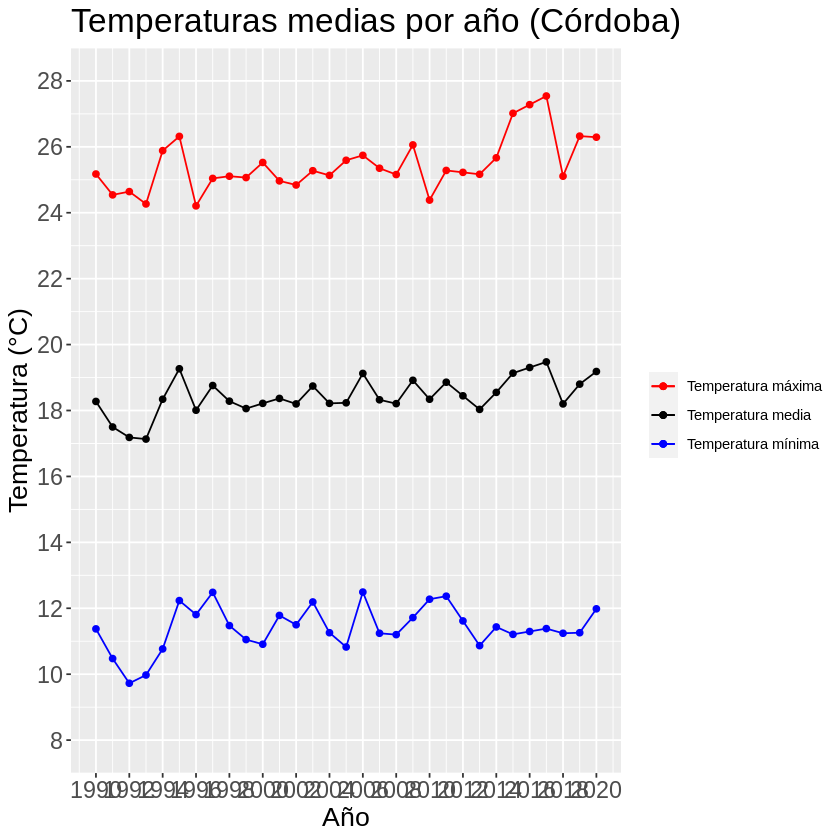

In [24]:
# Gráfico de lineas para mostrar de forma conjunta la temperatura media, máxima y mínima anual en la estación meteorológica de Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando las variables "año", "tm_max", "tm_min", "tm_mes"
grafica_lineas_7 <- ggplot(datos_graficas_C) +
  # Utilizamos la función geom_line para dibujar las líneas y la función geo_point para dibujar los puntos de valores
  geom_line(aes(x = año, y = tm_mes, color = "Temperatura media")) + geom_point(aes(x = año, y = tm_mes, color = "Temperatura media")) +
  geom_line(aes(x = año, y = tm_min, color = "Temperatura mínima")) + geom_point(aes(x = año, y = tm_min, color = "Temperatura mínima")) +
  geom_line(aes(x = año, y = tm_max, color = "Temperatura máxima")) + geom_point(aes(x = año, y = tm_max, color = "Temperatura máxima")) +
  # Establecemos  los colores deseados a cada una de las líneas de datos
  scale_color_manual(values = c("Temperatura media" = "black", "Temperatura mínima" = "blue", "Temperatura máxima" = "red")) +
  # Establecemos los intervalos y etiquetas para los ejes 
  scale_x_continuous(breaks = seq(1990, 2020, by = 2)) + scale_y_continuous(limits = c(8, 28), breaks = seq(8, 28, by=2)) +
  # Añadimos el título a la gráfica y a las etiquetas de los ejes  
  labs(x = "Año", y = "Temperatura (°C)", title = "Temperaturas medias por año (Córdoba)") + labs(color = NULL) +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 
  
# Mostramos en pantalla el gráfico
print(grafica_lineas_7)

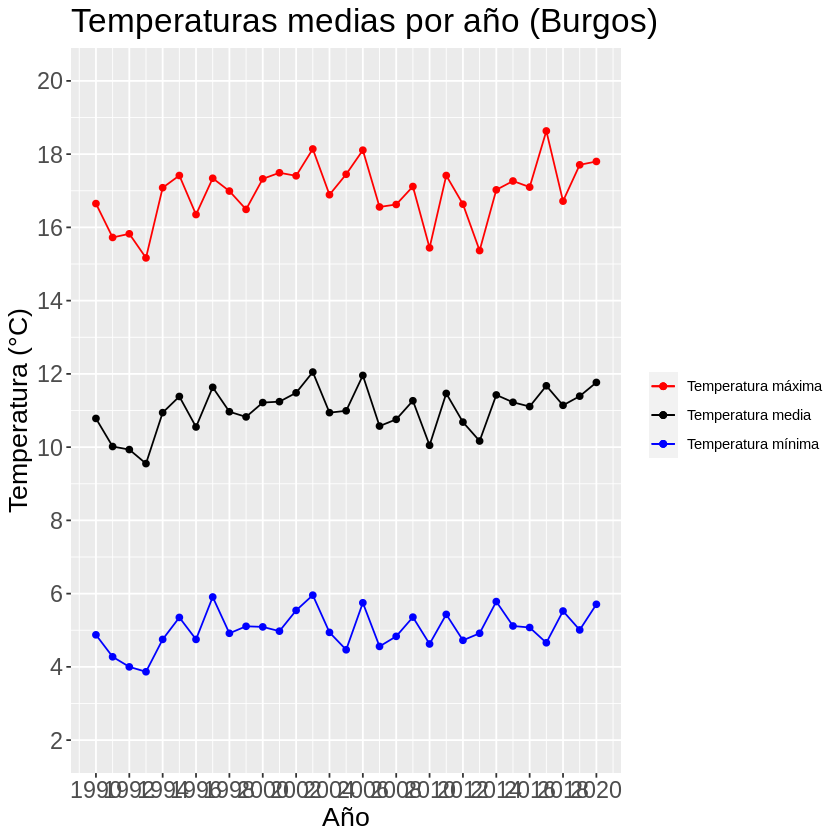

In [25]:
# Gráfico de lineas para mostrar de forma conjunta la temperatura media, máxima y mínima  anual en la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "año", "tm_max", "tm_min", "tm_mes"
grafica_lineas_8 <- ggplot(datos_graficas_B) +
  # Utilizamos la función geom_line para dibujar las líneas y la función geo_point para dibujar los puntos de valores
  geom_line(aes(x = año, y = tm_mes, color = "Temperatura media")) + geom_point(aes(x = año, y = tm_mes, color = "Temperatura media")) +
  geom_line(aes(x = año, y = tm_min, color = "Temperatura mínima")) + geom_point(aes(x = año, y = tm_min, color = "Temperatura mínima")) +
  geom_line(aes(x = año, y = tm_max, color = "Temperatura máxima")) + geom_point(aes(x = año, y = tm_max, color = "Temperatura máxima")) +
  # Establecemos  los colores deseados a cada una de las líneas de datos
  scale_color_manual(values = c("Temperatura media" = "black", "Temperatura mínima" = "blue", "Temperatura máxima" = "red")) +
  # Establecemos los intervalos y etiquetas para los ejes 
  scale_x_continuous(breaks = seq(1990, 2020, by = 2)) + scale_y_continuous(limits = c(2, 20), breaks = seq(2, 20, by=2)) +
  # Añadimos el título a la gráfica y a las etiquetas de los ejes 
  labs(x = "Año", y = "Temperatura (°C)", title = "Temperaturas medias por año (Burgos)") + labs(color = NULL) +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_lineas_8) 

## 5.2: Gáficos de barras

Generamos dos gráficos de barras con los datos de precipitaciones anuales "p_mes" acumuladas para las distintas estaciones meteorológicas. 

Al igual que en el apartado anterior, graficamos las líneas de tendencia y calculamos los coeficientes de pendiente.

`geom_smooth()` using formula = 'y ~ x'


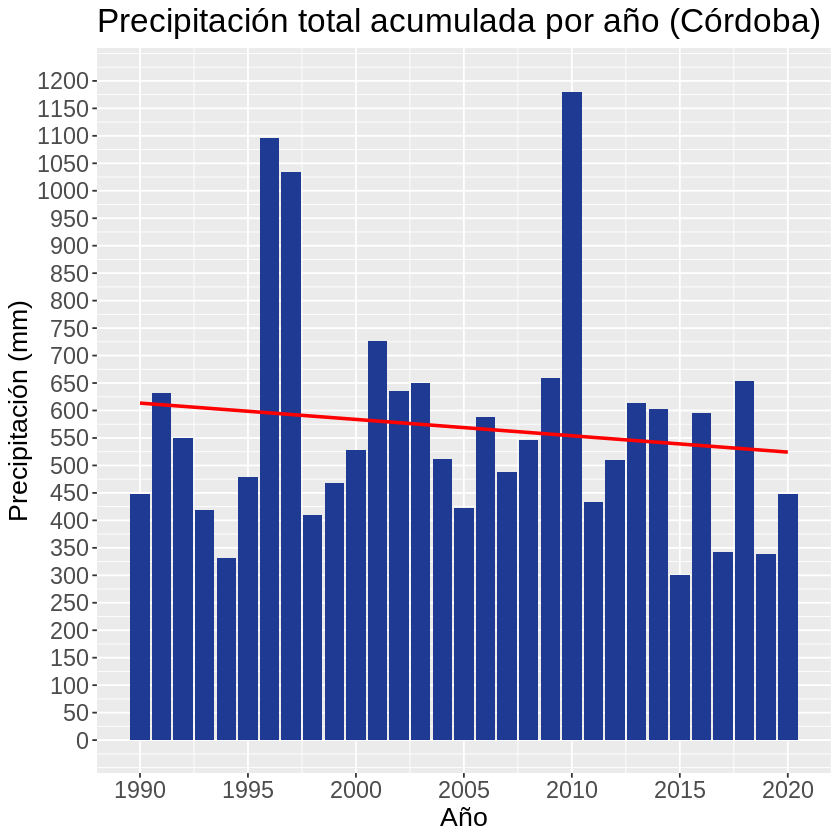

In [26]:
# Gráfico de barras para mostrar los valores de precipitaciones totales acumuladas por año en Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "año" y "p_mes"
grafica_barras_1 <- ggplot(datos_graficas_C, aes(x=año, y=p_mes)) +
  # Utilizamos la función geom_bar para dibujar las barras y la función geom_smooth para generar la línea de tendencia
  geom_bar(stat="identity", fill = "#1F3A93") + geom_smooth(method = "lm", se = FALSE, color = "red") +
  # Establecemos los intervalos y etiquetas para los ejes  
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(0, 1200), breaks = seq(0, 1200, by=50)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Precipitación (mm)", title="Precipitación total acumulada por año (Córdoba)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14))

# Mostramos en pantalla el gráfico
print(grafica_barras_1 )

`geom_smooth()` using formula = 'y ~ x'


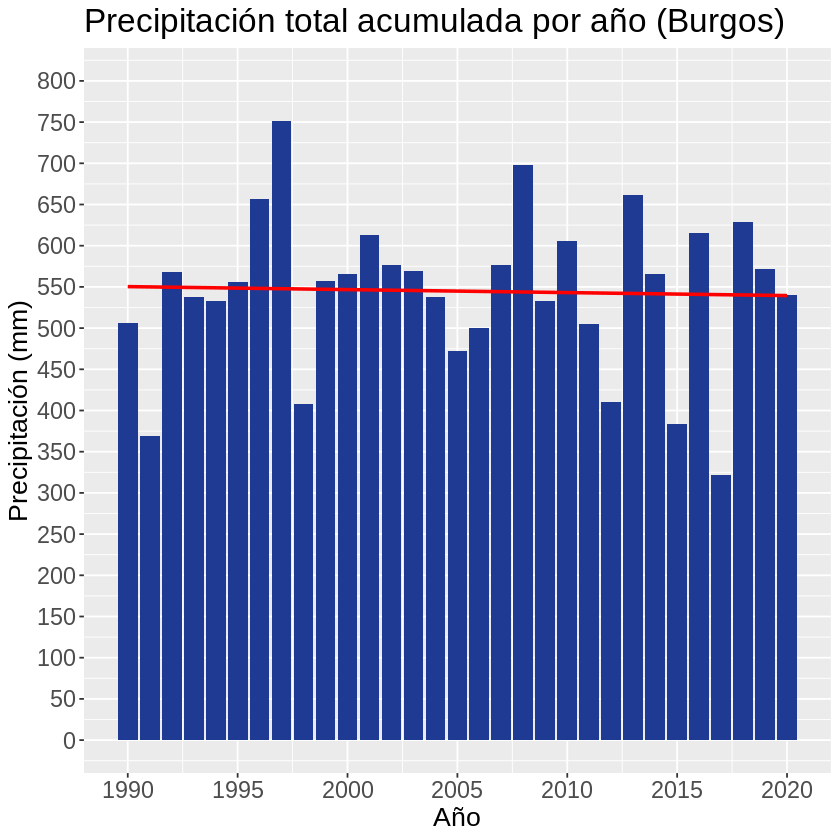

In [27]:
# Gráfico de barras para mostrar los valores de precipitaciones totales acumuladas por año en Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando las variables "año" y "p_mes"
grafica_barras_2 <- ggplot(datos_graficas_B, aes(x=año, y=p_mes)) +
  # Utilizamos la función geom_bar para dibujar las barras y la función geom_smooth para generar la línea de tendencia
  geom_bar(stat="identity", fill = "#1F3A93") + geom_smooth(method = "lm", se = FALSE, color = "red") +
  # Establecemos los intervalos y etiquetas para los ejes 
  scale_x_continuous(breaks = seq(1990, 2020, by = 5)) + scale_y_continuous(limits = c(0, 800), breaks = seq(0, 800, by=50)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Año", y="Precipitación (mm)", title="Precipitación total acumulada por año (Burgos)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14))

# Mostramos en pantalla el gráfico
print(grafica_barras_2)

In [28]:
# Ajustamos los modelos lineales de las líneas de tendencia
modelo7 <- lm(p_mes ~ año, data = datos_graficas_C)
modelo8 <- lm(p_mes ~ año, data = datos_graficas_B)

# Calculamos los coeficientes de pendiente
pendiente7 <- coef(modelo7)[2]
pendiente8 <- coef(modelo8)[2]

# Imprimimos por pantalla los coeficientes de pendiente previamente calculados
print(paste0("La variación de precipitación promedio anual de Córdoba es: ", pendiente7))
print(paste0("La variación de precipitación promedio anual de Burgos es: ", pendiente8))

[1] "La variación de precipitación promedio anual de Córdoba es: -2.97387096774193"
[1] "La variación de precipitación promedio anual de Burgos es: -0.362459677419355"


## 5.3: Histogramas

Generamos los histogramas correspondientes a los valores de precipitación acumulada por año "p_mes" para las disintas estaciones meteorológicas. 

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


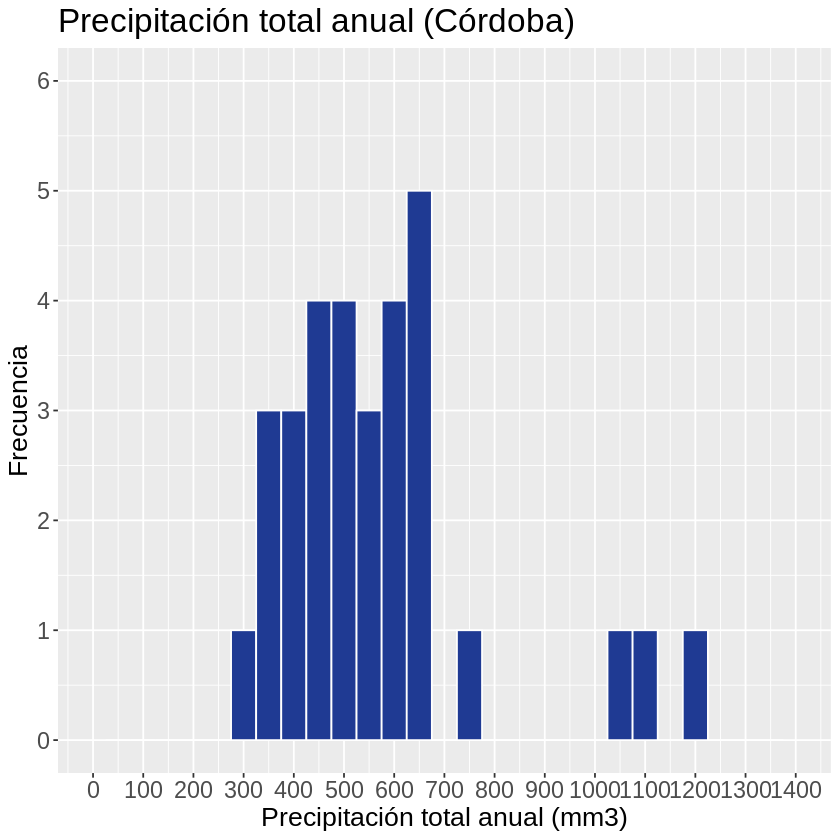

In [29]:
# Histograma con la distribucción de los valores anuales de precipitación acumulada registrados por la estación meteorológica de Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando la variable "p_mes"
histograma_1 <- ggplot(datos_graficas_C, aes(x = p_mes)) + 
  # Utilizamos la función geo_histogram para graficar las barras definiendo los intervalos "bin" 
  geom_histogram(binwidth = 50, fill = "#1F3A93", colour = "white") +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x="Precipitación total anual (mm3)", y="Frecuencia", title="Precipitación total anual (Córdoba)") +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(limits = c(000, 1400), breaks = seq(0, 1400, by = 100)) + scale_y_continuous(limits = c(0, 6), breaks = seq(0, 6, by=1)) +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14))

# Mostramos en pantalla el gráfico
print(histograma_1)

Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


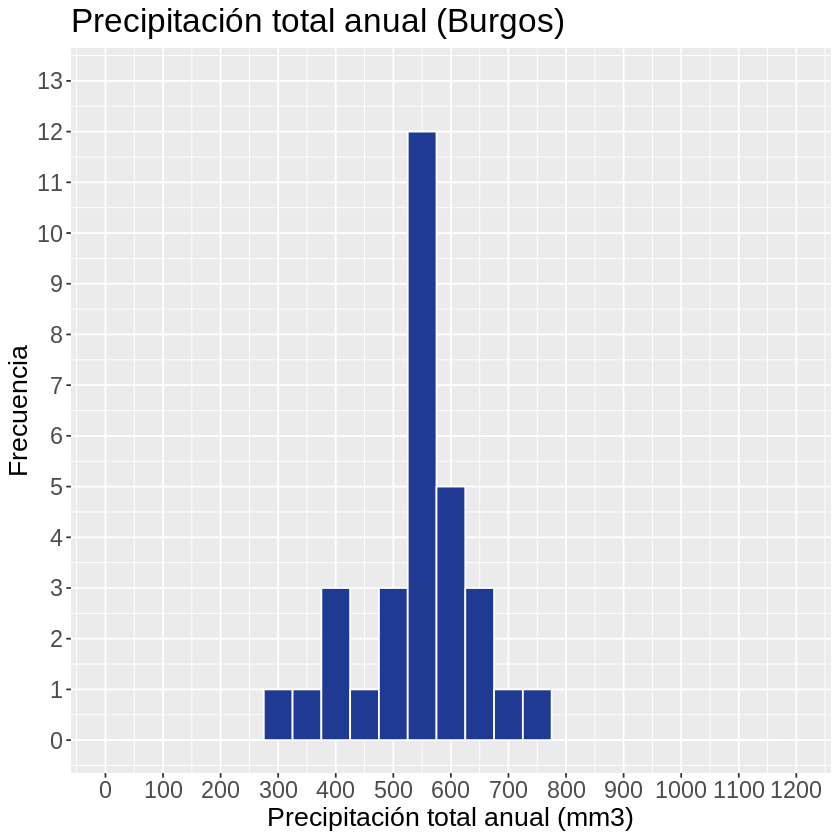

In [30]:
# Histograma con la distribucción de los valores anuales de precipitación acumulada registrados por la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_B" utilizando la variable "p_mes"
histograma_2 <- ggplot(datos_graficas_B, aes(x = p_mes)) + 
  # Utilizamos la función geo_histogram para graficar las barras definiendo los intervalos "bin"
  geom_histogram(binwidth = 50, fill = "#1F3A93", colour = "white") +
  # Añadimos el título a la gráfica y las etiquetas de los ejes 
  labs(x="Precipitación total anual (mm3)", y="Frecuencia", title="Precipitación total anual (Burgos)") +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(limits = c(0, 1200), breaks = seq(0, 1200, by = 100)) + scale_y_continuous(limits = c(0, 13), breaks = seq(0, 13, by=1)) +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes 
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14))

# Mostramos en pantalla el gráfico
print(histograma_2)

## 5.4: Diagramas de cajas

Generamos un gráfico con los diagramas de cajas y bigotes correspondientes a los datos de precipitaciones acumuladas "p_mes" de las estaciones climatológicas. Este tipo de diagramas es complementario a los histogramas generados en el apartado anterior.

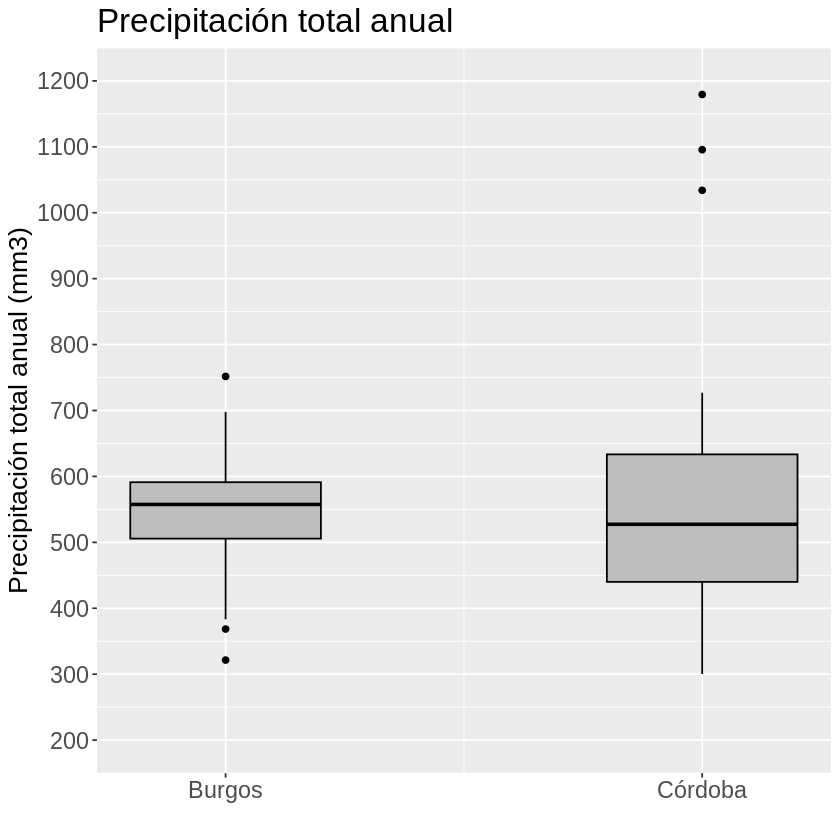

In [31]:
# Diagramas de cajas para mostrar las distribuciones de los valores de precipitaciones totales acumuladas por año en Córdoba y Burgos

# Mediante la librería ggplot se crea el diagrama de cajas y bigotes
grafica_cajas <- ggplot() + 
  # Generamos la geometría de caja de la tabla preprocesada "datos_graficas_C" para la variable "p_mes"
  geom_boxplot(data = datos_graficas_B, aes(x = 1, y = p_mes), fill = "grey", colour = "black", width = 0.4) +
  # Generamos la geometría de caja de la tabla preprocesada "datos_graficas_B" para la variable "p_mes"
  geom_boxplot(data = datos_graficas_C, aes(x = 2, y = p_mes), fill = "grey", colour = "black", width = 0.4) +  
  # Añadimos el título a la gráfica y la etiqueta de uno de los ejes 
  labs(x="", y="Precipitación total anual (mm3)", title="Precipitación total anual") +
  # Establecemos los intervalos y etiquetas para los ejes  
  scale_x_continuous(breaks = c(1, 2), labels = c("Burgos", "Córdoba")) + scale_y_continuous(limits = c(200, 1200), breaks = seq(200, 1200, by=100)) +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes
  theme(plot.title = element_text(size = 20), axis.title = element_text(size = 16), axis.text = element_text(size = 14))

# Mostramos en pantalla el gráfico
print(grafica_cajas)

In [32]:
# Obtenemos los principales valores estadísticos para los datos de precipitaciones de Córdoba
summary(datos_graficas_C$p_mes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  300.4   440.1   527.4   568.9   633.5  1179.4 

In [33]:
# Obtenemos los principales valores estadísticos para los datos de precipitaciones de Burgos
summary(datos_graficas_B$p_mes)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  321.4   505.7   557.5   544.9   591.2   751.7 

## 5.5: Gráficos de sectores

En una nueva tabla de datos, agrupamos los valores de la variable "nt_30" de la tabla "datos_graficas_B" correspondientes a la estación meteorológica de Burgos a modo de suma total para periodos de tiempo de 5 años.

Posteriormente generamos un gráfico de sectores (polares) utilizando la nueva tabla de datos agrupados generada anteriormente.

In [34]:
# Definimos una nueva variable "datos_graficas_B_agrupadas" a partir de la variable "datos_graficas_B"
datos_graficas_B_agrupadas <- datos_graficas_B %>%
  # Se crea una nueva variable "grupo" utilizando la función "case_when", la cual establece una condición para cada rango de años y asigna un nombre de grupo correspondiente.
  mutate(grupo = case_when(año >= 1990 & año < 1995 ~ "1990-1994", año >= 1995 & año < 2000 ~ "1995-1999", año >= 2000 & año < 2005 ~ "2000-2004",
    año >= 2005 & año < 2010 ~ "2005-2009", año >= 2010 & año < 2015 ~ "2010-2014",año >= 2015 & año <= 2020 ~ "2015-2020")) %>%
  # Se agrupa el conjunto de datos por la nueva variable "grupo".
  group_by(grupo) %>%
  # Se calcula la suma de la variable "nt_30" para cada grupo.  
  summarise(nt_30_sum = sum(nt_30))


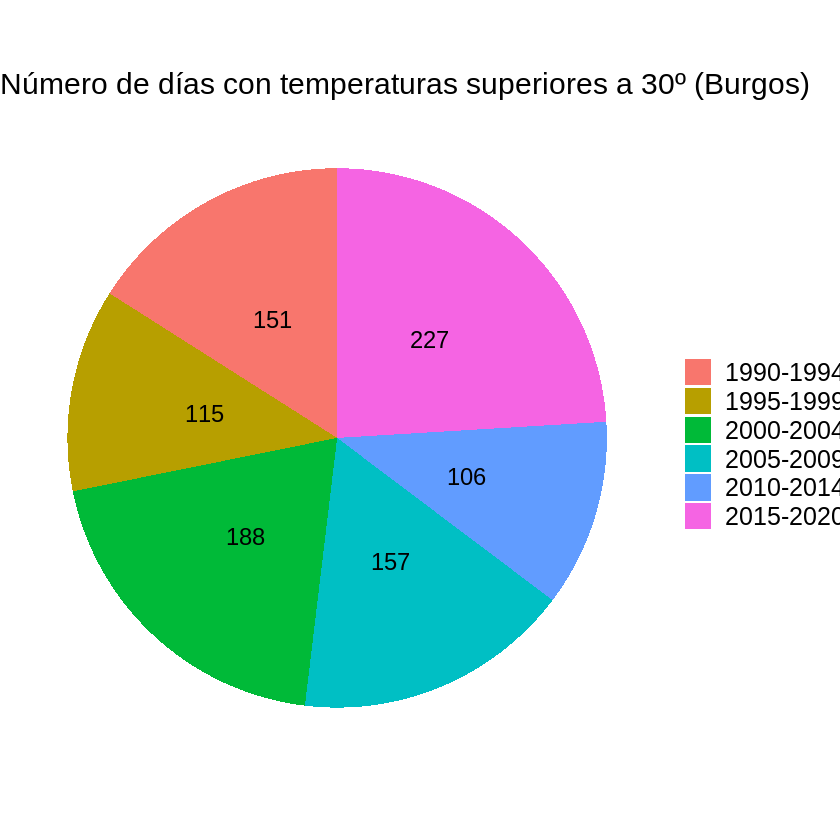

In [35]:
# Generamos una gráfica de sectores (polar) utilizando los datos previamente agrupados en "datos_graficas_B_agrupadas"
grafica_sectores_1 <- ggplot(datos_graficas_B_agrupadas, aes(x = "", y = nt_30_sum, fill = grupo)) +
  # Mediante la función geo_bar se crean las barras, donde stat = "identity" indica que la altura de la barra corresponde al valor de los datos y width = 1 establece el ancho de la barra en 1
  geom_bar(stat = "identity", width = 1) +
  # Establece la coordenada polar para la gráfica
  coord_polar("y", start = 0) +
  # Agregamos etiquetas de valores en la gráfica
  geom_text(aes(label = nt_30_sum), position = position_stack(vjust = 0.5), size = 5) +
  # Añadimos el título
  labs(title = "Número de días con temperaturas superiores a 30º (Burgos)") +
  # Mediante la función theme_void eliminamos el fondo y ejes. También ajustamos el tamaño del texto del título.
  theme_void() + theme(legend.text=element_text(size=15),legend.title=element_blank(),text=element_text(size=15)) 

# Mostramos en pantalla el gráfico
print(grafica_sectores_1)

Realizamos el mismo proceso para la variable "nt_30" de la tabla de datos "datos_graficas_C" correspondiente a la estación meteorológica de Córdoba.

In [36]:
# Definimos una nueva variable "datos_graficas_C_agrupadas" a partir de la variable "datos_graficas_C"
datos_graficas_C_agrupadas <- datos_graficas_C %>%
  # Se crea una nueva variable "grupo" utilizando la función "case_when", la cual establece una condición para cada rango de años y asigna un nombre de grupo correspondiente.
  mutate(grupo = case_when(año >= 1990 & año < 1995 ~ "1990-1994", año >= 1995 & año < 2000 ~ "1995-1999", año >= 2000 & año < 2005 ~ "2000-2004",
    año >= 2005 & año < 2010 ~ "2005-2009", año >= 2010 & año < 2015 ~ "2010-2014",año >= 2015 & año <= 2020 ~ "2015-2020")) %>%
  # Se agrupa el conjunto de datos por la nueva variable "grupo".
  group_by(grupo) %>%
  # Se calcula la suma de la variable "nt_30" para cada grupo.  
  summarise(nt_30_sum = sum(nt_30))


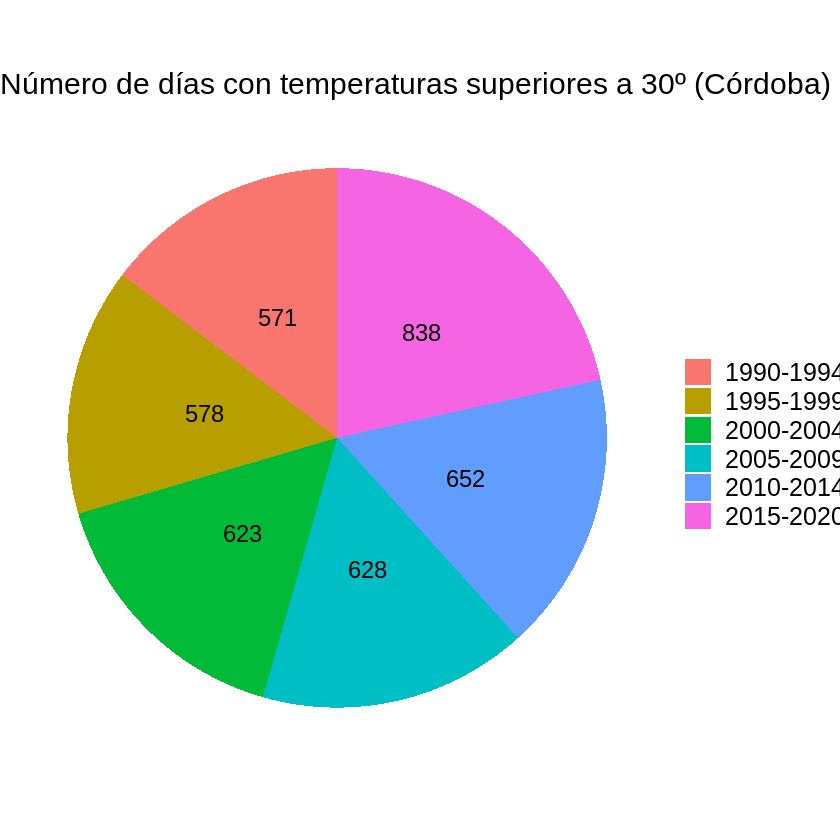

In [37]:
# Generamos una gráfica de sectores (polar) utilizando los datos previamente agrupados en "datos_graficas_B_agrupadas"
grafica_sectores_2 <- ggplot(datos_graficas_C_agrupadas, aes(x = "", y = nt_30_sum, fill = grupo)) +
  # Mediante la función geo_bar se crean las barras, donde stat = "identity" indica que la altura de la barra corresponde al valor de los datos y width = 1 establece el ancho de la barra en 1
  geom_bar(stat = "identity", width = 1) +
  # Establece la coordenada polar para la gráfica
  coord_polar("y", start = 0) +
  # Agregamos etiquetas de valores en la gráfica
  geom_text(aes(label = nt_30_sum), position = position_stack(vjust = 0.5), size = 5) +
  # Añadimos el título
  labs(title = "Número de días con temperaturas superiores a 30º (Córdoba)") +
  # Mediante la función theme_void eliminamos el fondo y ejes. También ajustamos el tamaño del texto del título.
  theme_void() + theme(legend.text=element_text(size=15),legend.title=element_blank(),text=element_text(size=15)) 

# Mostramos en pantalla el gráfico
print(grafica_sectores_2)

## 5.6 Gráficos de dispersión



Generamos varios gráficos de dispersión para buscar la correlación entre la tempetatura media mínima "tm_min" y la máxima "tm_max" de los datos de la estación meteorológica de Córdoba. También calcularemos el coeficiente de Pearson para obtener el grado de correlación lineal de una forma numérica. 

Por último, modificaremos la estética del gráfico para aportar más información de forma visual.

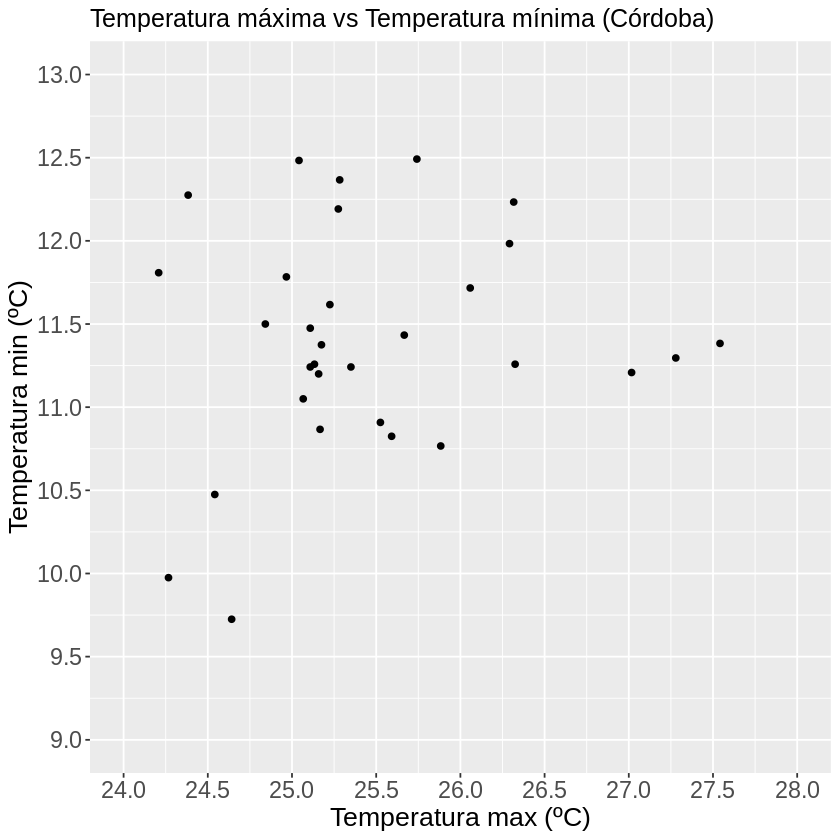

In [38]:
# Gráfico de dispersión para mostrar la relación entre la temperatura máxima y mínima media anual en la estación meteorológica de Córdoba

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "tm_max" y "tm_min"
grafica_dispersion_1 <- ggplot(datos_graficas_C, aes(x = tm_max, y = tm_min)) +
  # Utilizamos la función geom_point() para dibujar los puntos del gráfico
  geom_point() +
  scale_x_continuous(limits = c(24, 28), breaks = seq(24, 28, by = 0.5)) + scale_y_continuous(limits = c(9, 13), breaks = seq(9, 13, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x = "Temperatura max (ºC)", y = "Temperatura min (ºC)", title = "Temperatura máxima vs Temperatura mínima (Córdoba)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes  
  theme(plot.title = element_text(size = 15), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_dispersion_1)

In [39]:
# Calculamos el coeficiente de correlación de Pearson entre "tm_max" y "tm_min"
cor_C = cor(datos_graficas_C$tm_max, datos_graficas_C$tm_min)
print(paste0("El coeficiente de correlación de Person entre la temperatura media máxima y mínima anual en Córdoba es: ", cor_C))

[1] "El coeficiente de correlación de Person entre la temperatura media máxima y mínima anual en Córdoba es: 0.153251366429267"


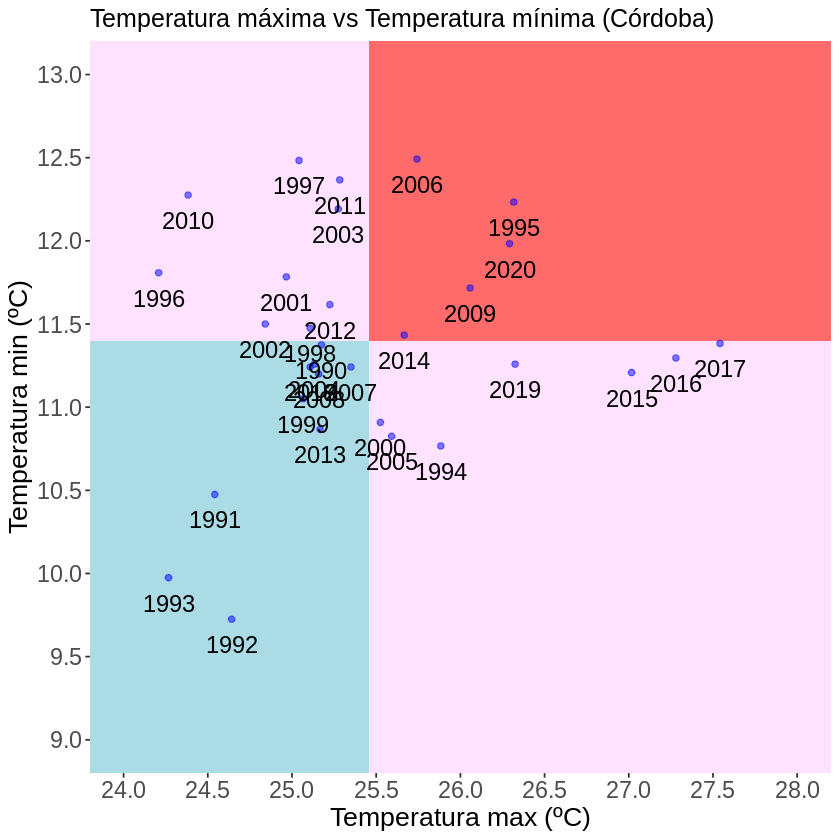

In [40]:
# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "tm_max" y "tm_min"
grafica_dispersion_2 <- ggplot(datos_graficas_C, aes(x = tm_max, y = tm_min)) +
  # Agregamos un rectángulo de color azul claro que cubre toda el área inferior izquierda del gráfico
  geom_rect(xmin = -Inf, xmax = mean(datos_graficas_C$tm_max), ymin = -Inf, ymax = mean(datos_graficas_C$tm_min), fill = "lightblue", alpha = 0.1) +
  # Agregamos un rectángulo de color rojo pálido que cubre toda el área superior izquierda del gráfico
  geom_rect(xmin = -Inf, xmax = mean(datos_graficas_C$tm_max), ymin = mean(datos_graficas_C$tm_min), ymax = Inf, fill = "thistle1", alpha = 0.5) +
  # Agregamos un rectángulo de color ojo pálido que cubre toda el área inferior derecha del gráfico
  geom_rect(xmin = mean(datos_graficas_C$tm_max), xmax = Inf, ymin = -Inf, ymax = mean(datos_graficas_C$tm_min), fill = "thistle1", alpha = 0.5) +
  # Agregamos un rectángulo de color rojo que cubre toda el área superior derecha del gráfico
  geom_rect(xmin = mean(datos_graficas_C$tm_max), xmax = Inf, ymin = mean(datos_graficas_C$tm_min), ymax = Inf, fill = "indianred1", alpha = 0.5) +
  # Agregamos los puntos al gráfico, coloreados de azul y con una transparencia de 0.5
  geom_point(color= "blue", alpha = 0.5) +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(limits = c(24, 28), breaks = seq(24, 28, by = 0.5)) + scale_y_continuous(limits = c(9, 13), breaks = seq(9, 13, by=0.5)) +
  # Ajustamos el rango de tamaño de los puntos a dibujar
  scale_size(range = c(1, 10)) +
  # Agregamos los nombres de cada punto al gráfico
  geom_text(aes(label = año), size = 5, vjust = 2, hjust = 0.5) + 
  # Agregamos el nombre del título y de los ejes
  labs(x="Temperatura max (ºC)", y="Temperatura min (ºC)", title="Temperatura máxima vs Temperatura mínima (Córdoba)") +
  # Ajustamos el tamaño del texto del título y de los ejes
  theme(plot.title = element_text(size = 15), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_dispersion_2)

Realizaremos los mismos pasos anteriormente descritos para los datos correspondientes a la estación meteorológica de Burgos.

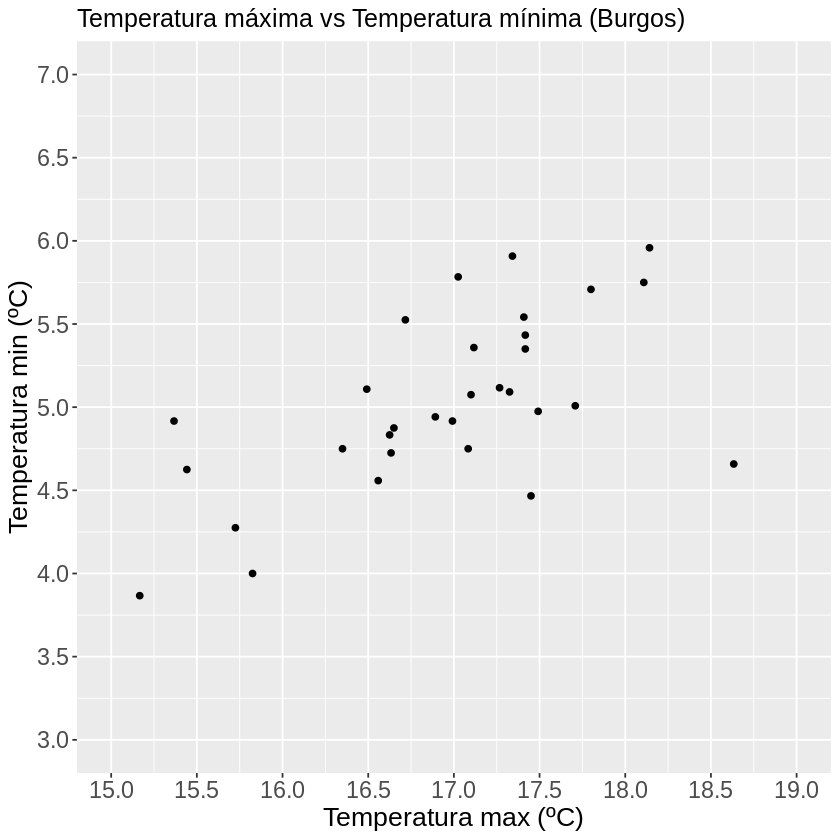

In [41]:
# Gráfico de dispersión para mostrar la relación entre la temperatura máxima y mínima media anual en la estación meteorológica de Burgos

# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "tm_max" y "tm_min"
grafica_dispersion_3 <- ggplot(datos_graficas_B, aes(x = tm_max, y = tm_min)) +
  # Utilizamos la función geom_point() para dibujar los puntos del gráfico
  geom_point() +
  scale_x_continuous(limits = c(15, 19), breaks = seq(15, 19, by = 0.5)) + scale_y_continuous(limits = c(3, 7), breaks = seq(3, 7, by=0.5)) +
  # Añadimos el título a la gráfica y las etiquetas de los ejes
  labs(x = "Temperatura max (ºC)", y = "Temperatura min (ºC)", title = "Temperatura máxima vs Temperatura mínima (Burgos)") +
  # Ajustamos los tamaños del título y de las etiquetas de los ejes  
  theme(plot.title = element_text(size = 15), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_dispersion_3)

In [42]:
# Calcular el coeficiente de correlación de Pearson entre tm_max y tm_min
cor_B = cor(datos_graficas_B$tm_max, datos_graficas_B$tm_min)
print(paste0("El coeficiente de correlación de Person entre la temperatura media máxima y mínima anual en Burgos es: ", cor_B))

[1] "El coeficiente de correlación de Person entre la temperatura media máxima y mínima anual en Burgos es: 0.614660670806051"


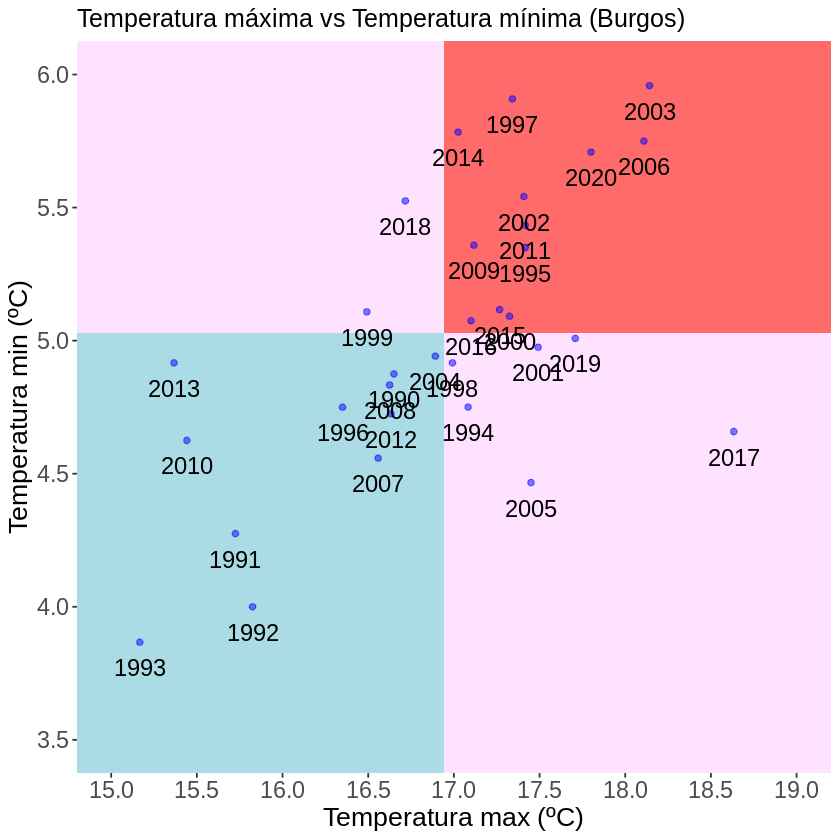

In [43]:
# Mediante la librería ggplot se crea el gráfico con los datos de la tabla preprocesada "datos_graficas_C" utilizando las variables "tm_max" y "tm_min"
grafica_dispersion_4 <- ggplot(datos_graficas_B, aes(x = tm_max, y = tm_min)) +
  # Agregamos un rectángulo de color azul claro que cubre toda el área inferior izquierda del gráfico
  geom_rect(xmin = -Inf, xmax = mean(datos_graficas_B$tm_max), ymin = -Inf, ymax = mean(datos_graficas_B$tm_min), fill = "lightblue", alpha = 0.1) +
  # Agregamos un rectángulo de color rojo pálido que cubre toda el área superior izquierda del gráfico
  geom_rect(xmin = -Inf, xmax = mean(datos_graficas_B$tm_max), ymin = mean(datos_graficas_B$tm_min), ymax = Inf, fill = "thistle1", alpha = 0.5) +
  # Agregamos un rectángulo de color ojo pálido que cubre toda el área inferior derecha del gráfico
  geom_rect(xmin = mean(datos_graficas_B$tm_max), xmax = Inf, ymin = -Inf, ymax = mean(datos_graficas_B$tm_min), fill = "thistle1", alpha = 0.5) +
  # Agregamos un rectángulo de color rojo que cubre toda el área superior derecha del gráfico
  geom_rect(xmin = mean(datos_graficas_B$tm_max), xmax = Inf, ymin = mean(datos_graficas_B$tm_min), ymax = Inf, fill = "indianred1", alpha = 0.5) +
  # Agregamos los puntos al gráfico, coloreados de azul y con una transparencia de 0.5
  geom_point(color= "blue", alpha = 0.5) +
  # Establecemos los intervalos y etiquetas para los ejes
  scale_x_continuous(limits = c(15, 19), breaks = seq(15, 19, by = 0.5)) + scale_y_continuous(limits = c(3.5, 6), breaks = seq(3.5, 6, by=0.5)) +
  # Ajustamos el rango de tamaño de los puntos a dibujar
  scale_size(range = c(1, 10)) +
  # Agregamos los nombres de cada punto al gráfico
  geom_text(aes(label = año), size = 5, vjust = 2, hjust = 0.5) + 
  # Agregamos los nombres de cada punto al gráfico
  labs(x="Temperatura max (ºC)", y="Temperatura min (ºC)", title="Temperatura máxima vs Temperatura mínima (Burgos)") +
  # Ajustamos el tamaño del texto del título y de los ejes
  theme(plot.title = element_text(size = 15), axis.title = element_text(size = 16), axis.text = element_text(size = 14)) 

# Mostramos en pantalla el gráfico
print(grafica_dispersion_4)

## 5.7: Matrices de correlación

Calculamos y graficamos la matriz de correlación de las tablas de datos preprocesados para ambas estaciones meteorológicas.

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


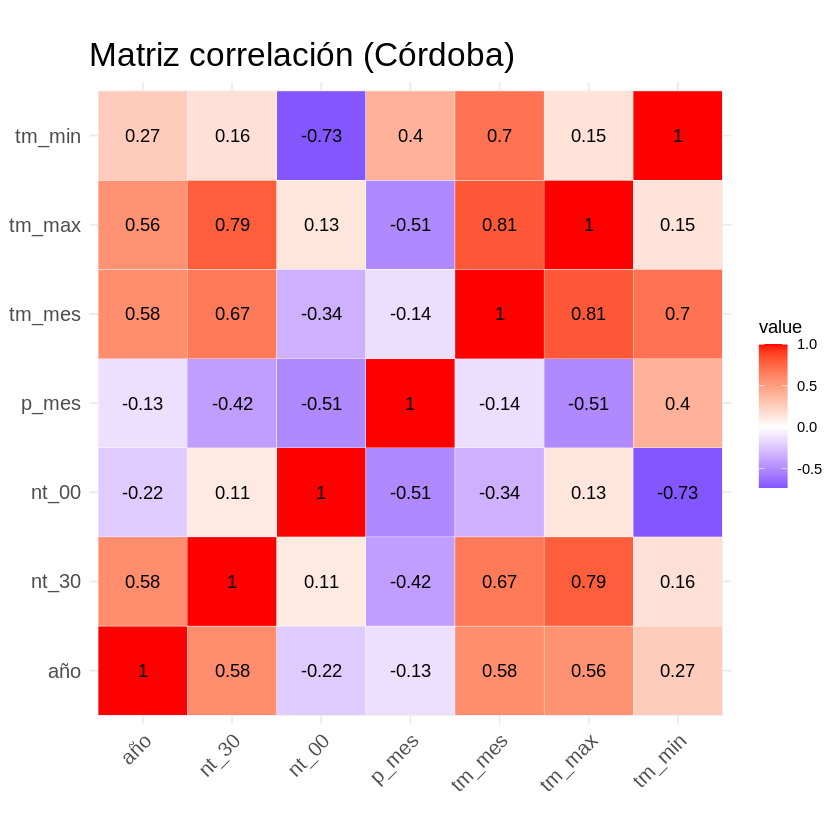

In [44]:
# Mediante la función cor calculamos la matriz de correlación a partir de la tabla de datos "datos_graficas_C"
matriz_correlacion <- cor(datos_graficas_C)

# Creamos la visualización mediante la función ggcorrplot de la matriz de correlación previamente calculada
matriz_correlacion_1 <- ggcorrplot(matriz_correlacion, type = "full", colors = c("blue", "white", "red")) +
  # Mediante la función geom_tile creamos el mosaico de colores de la matriz y mediante geo_text para agregar las etiquetas de texto
  geom_tile(aes(fill = value), color = "white") + geom_text(aes(label = round(value, 2))) +
  # Se define la escala de colores
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  # Añadimos el título a la gráfica
  labs(title="Matriz correlación (Córdoba)") +
  # Ajustamos los tamaños del título 
  theme(plot.title = element_text(size = 20))

# Mostramos en pantalla el gráfico
print(matriz_correlacion_1)

Scale for fill is already present.
Adding another scale for fill, which will replace the existing scale.


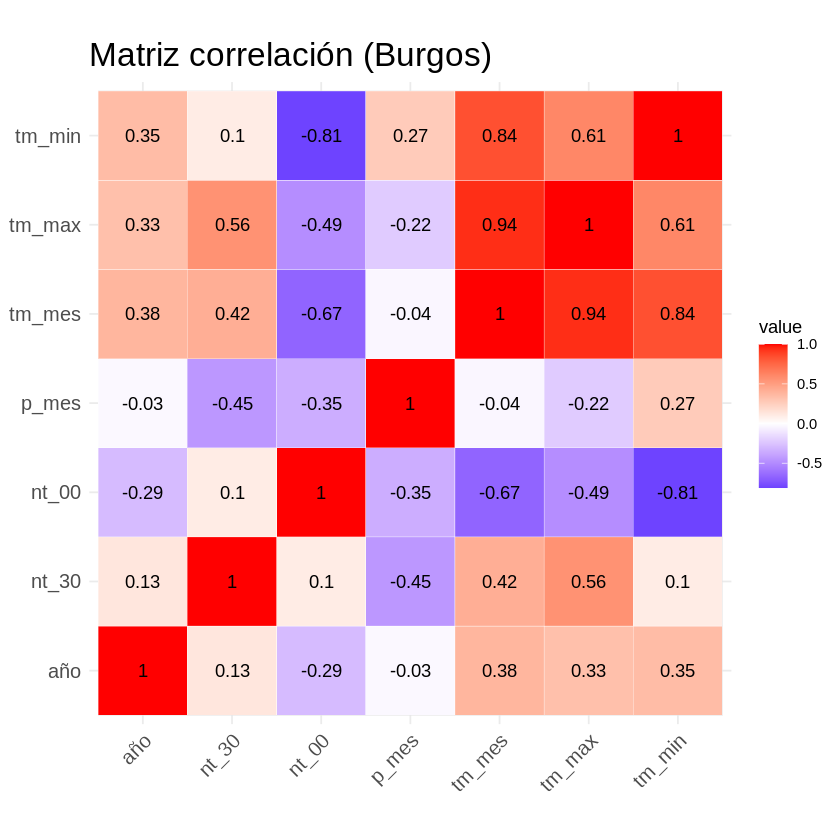

In [45]:
# Mediante la función cor calculamos la matriz de correlación a partir de la tabla de datos "datos_graficas_B"
matriz_correlacion <- cor(datos_graficas_B)

# Creamos la visualización mediante la función ggcorrplot de la matriz de correlación previamente calculada
matriz_correlacion_2 <- ggcorrplot(matriz_correlacion, type = "full", colors = c("blue", "white", "red")) +
  # Mediante la función geom_tile creamos el mosaico de colores de la matriz y mediante geo_text para agregar las etiquetas de texto
  geom_tile(aes(fill = value), color = "white") + geom_text(aes(label = round(value, 2))) +
  # Se define la escala de colores
  scale_fill_gradient2(low = "blue", mid = "white", high = "red", midpoint = 0) +
  # Añadimos el título a la gráfica
  labs(title="Matriz correlación (Burgos)") +
  # Ajustamos los tamaños del título 
  theme(plot.title = element_text(size = 20))

# Mostramos en pantalla el gráfico
print(matriz_correlacion_2)

# 6: Almacenamiento de gráficos

Por último, guardamos los gráficos en archivos png

In [46]:
# Guardamos los gráficos generados en los apartados anteriores en formato png con el tamaño deseado
ggsave("grafica_lineas_1.png", plot = grafica_lineas_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_2.png", plot = grafica_lineas_2, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_3.png", plot = grafica_lineas_3, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_4.png", plot = grafica_lineas_4, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_5.png", plot = grafica_lineas_5, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_6.png", plot = grafica_lineas_6, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_7.png", plot = grafica_lineas_7, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_lineas_8.png", plot = grafica_lineas_8, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_barras_1.png", plot = grafica_barras_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_barras_2.png", plot = grafica_barras_2, device = "png", dpi = 300, width = 10, height = 8)
ggsave("histograma_1.png", plot = histograma_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("histograma_2.png", plot = histograma_2, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_cajas.png", plot = grafica_cajas, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_sectores_1.png", plot = grafica_sectores_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_sectores_2.png", plot = grafica_sectores_2, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_dispersion_1.png", plot = grafica_dispersion_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_dispersion_2.png", plot = grafica_dispersion_2, device = "png", dpi = 300, width = 14, height = 8)
ggsave("grafica_dispersion_3.png", plot = grafica_dispersion_3, device = "png", dpi = 300, width = 10, height = 8)
ggsave("grafica_dispersion_4.png", plot = grafica_dispersion_4, device = "png", dpi = 300, width = 14, height = 8)
ggsave("matriz_correlacion_1.png", plot = matriz_correlacion_1, device = "png", dpi = 300, width = 10, height = 8)
ggsave("matriz_correlacion_2.png", plot = matriz_correlacion_2, device = "png", dpi = 300, width = 10, height = 8)


`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
`geom_smooth()` using formula = 'y ~ x'
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”
Warning message:
“Removed 2 rows containing missing values (`geom_bar()`).”


Una vez ejecutado todo el código, en la parte izquierda de la interfaz apareceran los archivos png generados con las visualizaciones, los cuales podremos descargar haciendo click sobre ellos con el botón derecho.